<a href="https://colab.research.google.com/github/Soumyagarg29/LP5/blob/master/a3_CNN_fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Convolutional neural network (CNN) (Any One from the following)  
• Use  MNIST  Fashion  Dataset  and  create  a  classifier  to  classify  fashion  clothing  into
categories

In [15]:
import numpy as np
import pandas as pd
import tensorflow
import matplotlib.pyplot as plt


In [3]:
from tensorflow.keras import datasets
from tensorflow.keras.datasets import fashion_mnist
(x_train , y_train) , (x_test , y_test) = fashion_mnist.load_data()

print('shape of X_train(no of samples , img height , img width) : ' ,x_train.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
shape of X_train(no of samples , img height , img width) :  (60000, 28, 28)


In [4]:
from tensorflow.keras import models , layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers  import Dense,Flatten, Conv2D , MaxPooling2D , Dropout

model = Sequential()

model.add(Conv2D(filters=64 , kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
'''
Filters (64): Learnable matrices that detect features (edges, textures).
Using 64 means the layer learns 64 different features. More filters → better learning capacity.

Kernel Size (3x3): Size of each filter. A 3×3 kernel captures local patterns efficiently with low computation. Common choices: (3,3), (5,5).

Input Shape (28, 28, 1): (height: number of pixels vertically , width: number of pixels horizontally, channels)

channels: 1 for grayscale images , 3 for RGB color images , 4 for RGBA images (includes transparency))

28x28: Image dimensions

1: Grayscale channel
Required to match the dataset’s format (e.g., Fashion MNIST).
'''


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


'\nFilters (64): Learnable matrices that detect features (edges, textures).\nUsing 64 means the layer learns 64 different features. More filters → better learning capacity.\n\nKernel Size (3x3): Size of each filter. A 3×3 kernel captures local patterns efficiently with low computation. Common choices: (3,3), (5,5).\n\nInput Shape (28, 28, 1): (height: number of pixels vertically , width: number of pixels horizontally, channels)\n\nchannels: 1 for grayscale images , 3 for RGB color images , 4 for RGBA images (includes transparency))\n\n28x28: Image dimensions\n\n1: Grayscale channel\nRequired to match the dataset’s format (e.g., Fashion MNIST).\n'

In [5]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [6]:
model.add(Flatten())

In [7]:
model.add(Dense(128 , activation='relu'))
model.add(Dense(10 , activation='softmax'))


In [8]:
model.compile(loss='sparse_categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])


In [9]:
model.fit(x_train , y_train , epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 37ms/step - accuracy: 0.7989 - loss: 4.3295
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 35ms/step - accuracy: 0.8988 - loss: 0.2789
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 36ms/step - accuracy: 0.9117 - loss: 0.2406
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.9217 - loss: 0.2118
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 35ms/step - accuracy: 0.9245 - loss: 0.2014


In [11]:
evaluation = model.evaluate(x_test,y_test)
evaluation

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8875 - loss: 0.3310


[0.3309825658798218, 0.8881000280380249]

Streaming output truncated to the last 5000 lines.
dress
shirt
coat
coat
dress
dress
ankle_boots
coat
ankle_boots
t_shirt
bag
dress
sandal
shirt
coat
t_shirt
trouser
dress
ankle_boots
coat
pullover
sandal
t_shirt
sandal
trouser
pullover
sandal
shirt
t_shirt
shirt
t_shirt
shirt
ankle_boots
trouser
dress
coat
shirt
sandal
sandal
shirt
t_shirt
trouser
coat
ankle_boots
sneaker
coat
coat
sneaker
sandal
sneaker
trouser
coat
bag
sneaker
ankle_boots
sandal
sneaker
t_shirt
pullover
ankle_boots
pullover
sandal
t_shirt
sneaker
bag
coat
sandal
pullover
ankle_boots
dress
dress
pullover
sandal
ankle_boots
shirt
sandal
sneaker
sneaker
dress
bag
dress
sandal
shirt
sandal
dress
t_shirt
sneaker
shirt
ankle_boots
ankle_boots
trouser
dress
shirt
ankle_boots
dress
coat
coat
sandal
dress
coat
sneaker
ankle_boots
trouser
pullover
pullover
pullover
coat
shirt
bag
sneaker
ankle_boots
ankle_boots
coat
bag
bag
ankle_boots
t_shirt
sneaker
shirt
coat
dress
bag
shirt
coat
pullover
t_shirt
trouser
coat
t_shirt
pullo

ValueError: Invalid affine transformation matrix

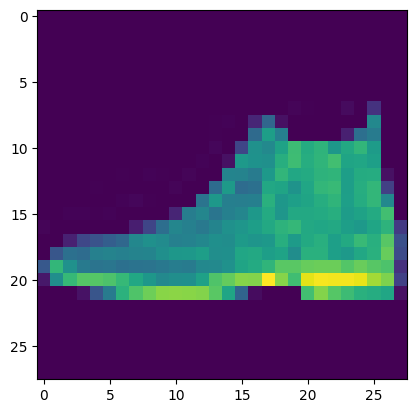

In [25]:
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker',   'bag', 'ankle_boots']
predictions = model.predict(x_test[11:12])
label = labels[np.argmax(predictions)]
print(label)
plt.imshow(x_test[11:12][0])

CNN Notes for understanding :
https://www.youtube.com/watch?v=zfiSAzpy9NM&t=317s

Feature Extraction : convolution, pooling (to reduce image dimension (types of pooling : max or avg))
classification : flatten , and classify


hyperparameter: no of filters and size of filter